# Import the libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from collections import Counter

# checking the device

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


# Hyperparameters

In [3]:
input_size = 784  # 28x28 images
hidden_size = 128
num_classes = 10  # 10 digits (0-9)
num_epochs = 20
batch_size = 64
learning_rate = 0.001


# Transformations and Dataset Preparation

In [4]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [5]:
print(transform)

Compose(
    ToTensor()
    Normalize(mean=(0.5,), std=(0.5,))
)


In [6]:
train_dataset = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root="./data", train=False, transform=transform, download=True)

print(train_dataset)
print(test_dataset)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 39032032.70it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1170234.88it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 10635595.04it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 7947654.89it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )


In [7]:
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

print(train_loader)

# Count the number of images in each class

In [8]:
train_labels_count = Counter(train_dataset.targets.numpy())
test_labels_count = Counter(test_dataset.targets.numpy())


In [9]:
print("Number of images in training dataset:", len(train_dataset))
print("Number of images in testing dataset:", len(test_dataset))
print("Class distribution in training dataset:")
for label, count in train_labels_count.items():
    print(f"Class {label}: {count} images")


Number of images in training dataset: 60000
Number of images in testing dataset: 10000
Class distribution in training dataset:
Class 5: 5421 images
Class 0: 5923 images
Class 4: 5842 images
Class 1: 6742 images
Class 9: 5949 images
Class 2: 5958 images
Class 3: 6131 images
Class 6: 5918 images
Class 7: 6265 images
Class 8: 5851 images


# Defining the ANN model

In [10]:
class ANN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.norm1 = nn.BatchNorm1d(hidden_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.norm2 = nn.BatchNorm1d(hidden_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.norm3 = nn.BatchNorm1d(hidden_size)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_size, hidden_size)
        self.norm4 = nn.BatchNorm1d(hidden_size)
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = x.view(-1, input_size)  # Flatten the images
        x = self.fc1(x)
        x = self.norm1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.norm2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.norm3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        x = self.norm4(x)
        x = self.relu4(x)
        x = self.fc5(x)
        return x

model = ANN(input_size, hidden_size, num_classes).to(device)


In [11]:
print(model)

ANN(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (norm1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (norm2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=128, out_features=128, bias=True)
  (norm3): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (fc4): Linear(in_features=128, out_features=128, bias=True)
  (norm4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu4): ReLU()
  (fc5): Linear(in_features=128, out_features=10, bias=True)
)


# Loss and Optimizer

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [13]:
print(criterion)
print(optimizer)

CrossEntropyLoss()
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)


# Training Loop

In [14]:
print("Training the model...")
for epoch in range(num_epochs):
    model.train()
    for batch_idx, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")


Training the model...
Epoch [1/20], Loss: 0.3431
Epoch [2/20], Loss: 0.2427
Epoch [3/20], Loss: 0.1575
Epoch [4/20], Loss: 0.0351
Epoch [5/20], Loss: 0.0232
Epoch [6/20], Loss: 0.0508
Epoch [7/20], Loss: 0.0054
Epoch [8/20], Loss: 0.0185
Epoch [9/20], Loss: 0.0277
Epoch [10/20], Loss: 0.0007
Epoch [11/20], Loss: 0.0056
Epoch [12/20], Loss: 0.0185
Epoch [13/20], Loss: 0.0007
Epoch [14/20], Loss: 0.0492
Epoch [15/20], Loss: 0.0104
Epoch [16/20], Loss: 0.0370
Epoch [17/20], Loss: 0.0005
Epoch [18/20], Loss: 0.0018
Epoch [19/20], Loss: 0.0077
Epoch [20/20], Loss: 0.0269


# Testing Loop

Epoch [1/20], Loss: 0.0147, Accuracy: 99.50%
Epoch [2/20], Loss: 0.0139, Accuracy: 99.53%
Epoch [3/20], Loss: 0.0133, Accuracy: 99.57%
Epoch [4/20], Loss: 0.0121, Accuracy: 99.61%
Epoch [5/20], Loss: 0.0141, Accuracy: 99.54%
Epoch [6/20], Loss: 0.0115, Accuracy: 99.62%
Epoch [7/20], Loss: 0.0108, Accuracy: 99.63%
Epoch [8/20], Loss: 0.0109, Accuracy: 99.63%
Epoch [9/20], Loss: 0.0116, Accuracy: 99.61%
Epoch [10/20], Loss: 0.0099, Accuracy: 99.67%
Epoch [11/20], Loss: 0.0119, Accuracy: 99.59%
Epoch [12/20], Loss: 0.0101, Accuracy: 99.67%
Epoch [13/20], Loss: 0.0075, Accuracy: 99.76%
Epoch [14/20], Loss: 0.0085, Accuracy: 99.72%
Epoch [15/20], Loss: 0.0098, Accuracy: 99.67%
Epoch [16/20], Loss: 0.0087, Accuracy: 99.71%
Epoch [17/20], Loss: 0.0079, Accuracy: 99.76%
Epoch [18/20], Loss: 0.0095, Accuracy: 99.72%
Epoch [19/20], Loss: 0.0065, Accuracy: 99.78%
Epoch [20/20], Loss: 0.0082, Accuracy: 99.72%


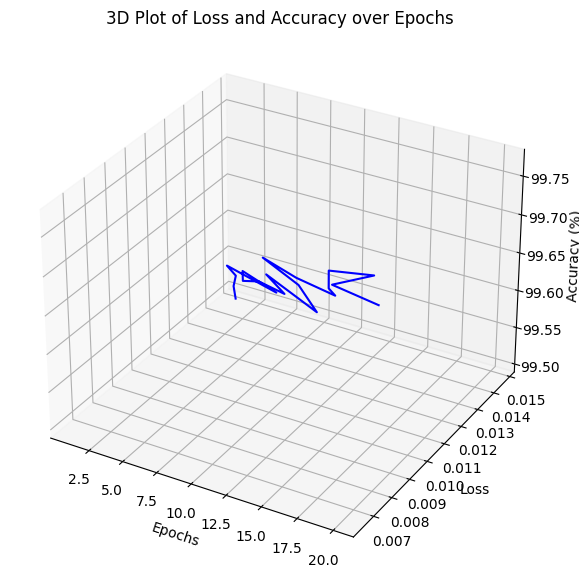

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Initialize lists to store loss, accuracy, and epochs
loss_list = []
accuracy_list = []
epoch_list = list(range(1, num_epochs + 1))

# Training loop with loss and accuracy tracking
for epoch in range(num_epochs):
    model.train()
    correct = 0
    total = 0
    running_loss = 0.0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Statistics
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Calculate average loss and accuracy for this epoch
    epoch_loss = running_loss / len(train_loader)
    accuracy = 100 * correct / total
    loss_list.append(epoch_loss)
    accuracy_list.append(accuracy)

    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.2f}%")

# After training completes, plot the 3D graph
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting loss and accuracy over epochs in 3D
ax.plot(epoch_list, loss_list, accuracy_list, label='Loss & Accuracy over Epochs', color='blue')

# Label the axes
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.set_zlabel('Accuracy (%)')

# Set the title
ax.set_title('3D Plot of Loss and Accuracy over Epochs')

# Show the plot
plt.show()


# Saving the Model

In [16]:
torch.save(model.state_dict(), "mnist_ann.pth")
print("Model saved as mnist_ann.pth")


Model saved as mnist_ann.pth
